In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from matplotlib import pyplot as plt


In [44]:

df = pd.read_csv('mcdonalds.csv')
df.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,+2,56,Every three months,Female
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,23,Once a week,Female
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,58,Once a year,Male
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+1,32,Every three months,Female


In [45]:
df['Like'] = df['Like'].replace({
    'I love it!+5': '+5',
    'I hate it!-5': '-5',
})
df.head(30)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,+2,56,Every three months,Female
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+5,23,Once a week,Female
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,-5,58,Once a year,Male
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+1,32,Every three months,Female


In [46]:
df['Like'] = df['Like'].replace({
    '+5': 'really_like',
    '+4': 'really_like',
    '+3': 'like',
    '+2': 'like',
    '+1': 'like',
    '0': 'neutral',
    '-1': 'do_not_like',
    '-2': 'do_not_like',
    '-3': 'do_not_like',
    '-4': 'dislike',
    '-5': 'dislike',})
df.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,do_not_like,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,like,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,like,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,really_like,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,like,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,like,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,like,56,Every three months,Female
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,really_like,23,Once a week,Female
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,dislike,58,Once a year,Male
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,like,32,Every three months,Female


In [47]:
ideal_segment = df[df['Like'].isin(['really_like', 'like'])]


In [48]:
print(ideal_segment['Age'].describe())

count    871.000000
mean      42.045924
std       14.355669
min       18.000000
25%       30.000000
50%       41.000000
75%       55.000000
max       71.000000
Name: Age, dtype: float64


In [49]:
print(ideal_segment['Gender'].value_counts())

Gender
Female    487
Male      384
Name: count, dtype: int64


In [50]:
print(ideal_segment['VisitFrequency'].value_counts())

VisitFrequency
Once a month             366
Once a week              211
Every three months       188
Once a year               53
More than once a week     50
Never                      3
Name: count, dtype: int64


In [51]:
preferences = ['yummy', 'convenient', 'spicy', 'tasty', 'healthy', 'cheap', 'fast']
for col in preferences:
    print(f"\n{col} distribution:")
    print(ideal_segment[col].value_counts())


yummy distribution:
yummy
Yes    705
No     166
Name: count, dtype: int64

convenient distribution:
convenient
Yes    849
No      22
Name: count, dtype: int64

spicy distribution:
spicy
No     797
Yes     74
Name: count, dtype: int64

tasty distribution:
tasty
Yes    762
No     109
Name: count, dtype: int64

healthy distribution:
healthy
No     628
Yes    243
Name: count, dtype: int64

cheap distribution:
cheap
Yes    568
No     303
Name: count, dtype: int64

fast distribution:
fast
Yes    813
No      58
Name: count, dtype: int64


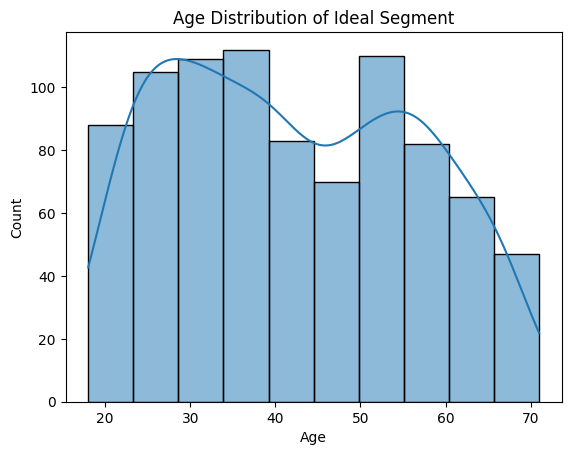

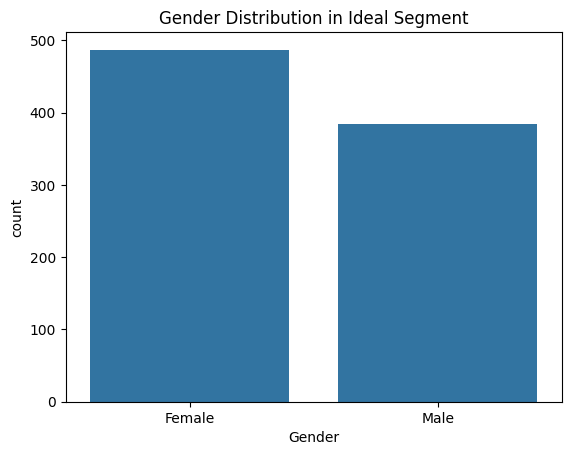

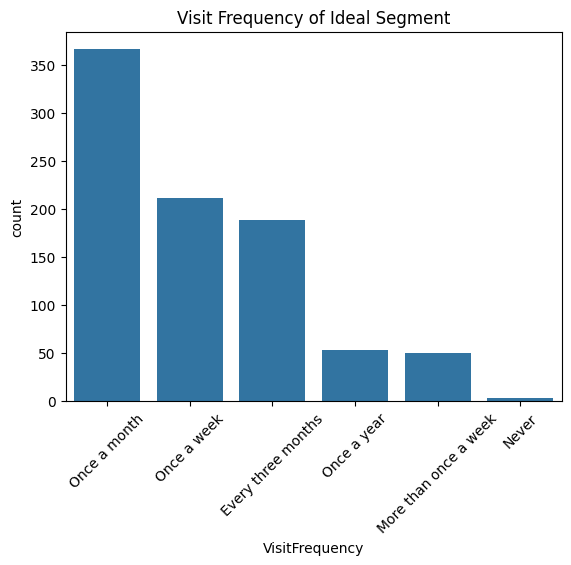

In [52]:
# Age distribution
sns.histplot(ideal_segment['Age'], bins=10, kde=True)
plt.title("Age Distribution of Ideal Segment")
plt.show()

# Gender distribution
sns.countplot(x='Gender', data=ideal_segment)
plt.title("Gender Distribution in Ideal Segment")
plt.show()

# Visit frequency
sns.countplot(x='VisitFrequency', data=ideal_segment, order=ideal_segment['VisitFrequency'].value_counts().index)
plt.title("Visit Frequency of Ideal Segment")
plt.xticks(rotation=45)
plt.show()


In [53]:
df['IdealTarget'] = df['Like'].apply(lambda x: 1 if x in ['really_like', 'like'] else 0)

In [54]:
df['Like'] = pd.Categorical(df['Like'], 
    categories=['really like', 'like', 'neutral', 'do not like', 'dislike'], 
    ordered=True)


In [55]:
le = LabelEncoder()
for col in ['yummy', 'convenient', 'spicy', 'fattening', 'greasy',
            'fast', 'cheap', 'tasty', 'expensive', 'healthy',
            'disgusting', 'VisitFrequency', 'Gender']:
    df[col] = le.fit_transform(df[col])

In [56]:
X = df.drop(['Like', 'IdealTarget'], axis=1)
y = df['IdealTarget']

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


In [59]:
X = df.drop(['Like', 'IdealTarget'], axis=1)
y = df['IdealTarget']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [60]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8625429553264605

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       125
           1       0.87      0.90      0.88       166

    accuracy                           0.86       291
   macro avg       0.86      0.86      0.86       291
weighted avg       0.86      0.86      0.86       291



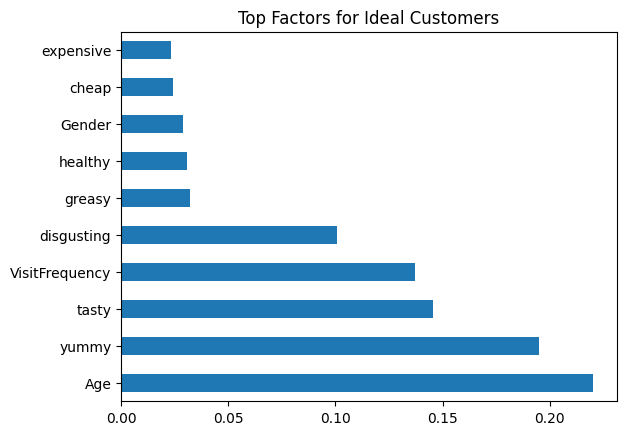

In [62]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top Factors for Ideal Customers")
plt.show()


In [64]:
print(df['Segment'].value_counts())

KeyError: 'Segment'